
Mean Squared Error: 8331888991.829826


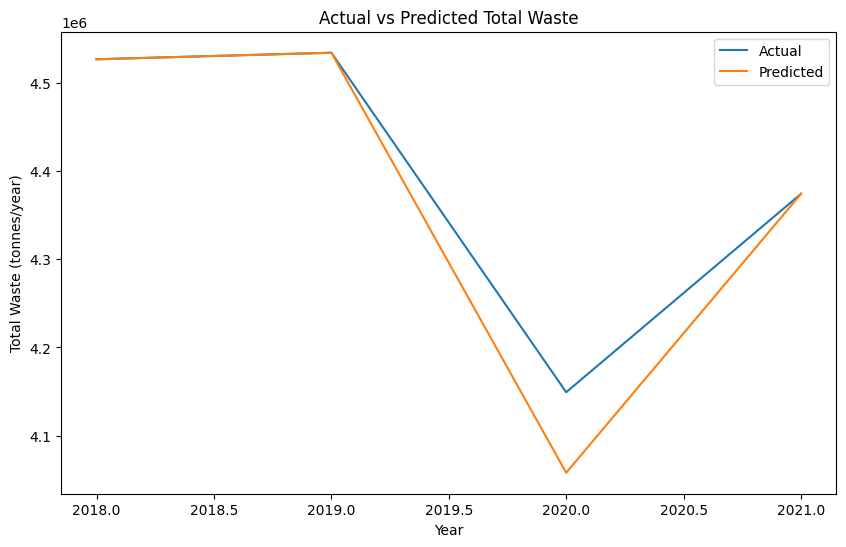


Updated Dataset:
  Country  Year  Household_estimate  Food_service_estimate  Retail_estimate  \
0  Canada  2021        2.938321e+06           9.566150e+05    479284.000000   
1  Canada  2020        2.693514e+06           9.410060e+05    514689.000000   
2  Canada  2019        2.993388e+06           1.008005e+06    532771.000000   
3  Canada  2018        3.110805e+06           9.297010e+05    486251.000000   
4  Canada  2017        2.678854e+06           9.194894e+05    488659.334733   
5  Canada  2016        2.732068e+06           9.377308e+05    546691.707172   
6  Canada  2022        3.260699e+06           9.029844e+05    463572.467851   
7  Canada  2023        2.597944e+06           1.060602e+06    532946.852907   

    total_waste  
0  4.374220e+06  
1  4.149209e+06  
2  4.534164e+06  
3  4.526757e+06  
4  4.087002e+06  
5  4.216490e+06  
6  4.627256e+06  
7  4.191493e+06  

Prediction for the next year (2024): 4721521.171435099 tonnes

Prediction for the next year (2024) with was

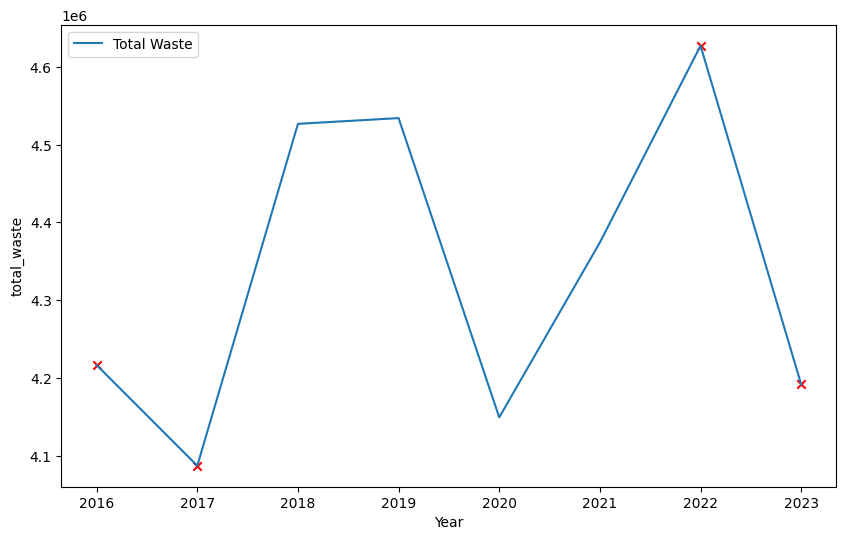

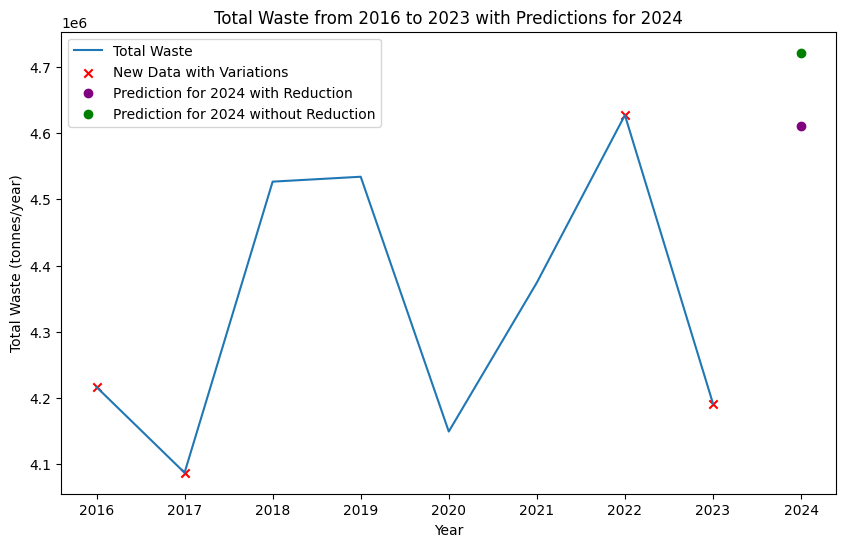

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Функція для генерації варіацій
def generate_variation(value):
    variation_percentage = random.uniform(-0.12, 0.12)
    variation = value * variation_percentage
    return value + variation

# Ваш набір даних
data = {
    'Country': ['Canada', 'Canada', 'Canada', 'Canada'],
    'Year': [2021, 2020, 2019, 2018],
    'Household_estimate': [2938321, 2693514, 2993388, 3110805],
    'Food_service_estimate': [956615, 941006, 1008005, 929701],
    'Retail_estimate': [479284, 514689, 532771, 486251]
}

df_original = pd.DataFrame(data)

# Конвертація стовпця 'Year' в числовий формат
df_original['Year'] = pd.to_numeric(df_original['Year'])

# Розрахунок 'total_waste'
df_original['total_waste'] = df_original['Household_estimate'] + df_original['Food_service_estimate'] + df_original['Retail_estimate']

# Розділення даних на ознаки та цільову змінну
X = df_original[['Year', 'Household_estimate', 'Food_service_estimate']]
y = df_original['total_waste']

# Розділення даних на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнози на тестовому наборі
y_pred = model.predict(X_test)

# Оцінка точності моделі
mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')

# Візуалізація фактичних та прогнозованих значень
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='total_waste', data=df_original, label='Actual')
sns.lineplot(x='Year', y=model.predict(X), data=df_original, label='Predicted')
plt.title('Actual vs Predicted Total Waste')
plt.xlabel('Year')
plt.ylabel('Total Waste (tonnes/year)')
plt.legend()
plt.show()

# Adding data for 2016, 2017, 2022, and 2023 with variations
new_data = {
    'Country': ['Canada', 'Canada', 'Canada', 'Canada'],
    'Year': [2017, 2016, 2022, 2023],
    'Household_estimate': [generate_variation(df_original['Household_estimate'].mean()) for _ in range(4)],
    'Food_service_estimate': [generate_variation(df_original['Food_service_estimate'].mean()) for _ in range(4)],
    'Retail_estimate': [generate_variation(df_original['Retail_estimate'].mean()) for _ in range(4)]
}

# Adding new data to the existing dataset
df_updated = pd.concat([df_original, pd.DataFrame(new_data)], ignore_index=True)

# Розрахунок 'total_waste' для оновленого датасету
df_updated['total_waste'] = df_updated['Household_estimate'] + df_updated['Food_service_estimate'] + df_updated['Retail_estimate']

# Displaying the updated dataset with 'total_waste'
print("\nUpdated Dataset:")
print(df_updated)

# Visualization of the updated dataset with 'total_waste'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='total_waste', data=df_updated, label='Total Waste')
plt.scatter(new_data['Year'], df_updated.loc[df_updated['Year'].isin(new_data['Year']), 'total_waste'], color='red', label='New Data with Variations', marker='x')

# Prediction for the next year (2024)
future_data_2024 = {'Country': ['Canada'], 'Year': [2024], 'Household_estimate': [generate_variation(df_updated['Household_estimate'].mean())], 'Food_service_estimate': [generate_variation(df_updated['Food_service_estimate'].mean())]}
future_df_2024 = pd.DataFrame(future_data_2024)

# Adding the 'reduction_percentage' for 2024
reduction_percentage_2024 = random.uniform(0.0215, 0.0235)  # assuming it's a random value within the specified range
df_updated.loc[df_updated['Year'] == 2024, 'reduction_percentage'] = reduction_percentage_2024

# Adding the 'total_waste' column to the future_df_2024
future_df_2024['total_waste'] = future_df_2024['Household_estimate'] + future_df_2024['Food_service_estimate'] + df_updated[df_updated['Year'] == 2023]['Retail_estimate'].values[0]

# Prediction
future_prediction_2024 = model.predict(future_df_2024[['Year', 'Household_estimate', 'Food_service_estimate']])
print(f'\nPrediction for the next year (2024): {future_prediction_2024[0]} tonnes')

# Prediction for 2024 with waste reduction
future_prediction_2024_with_reduction = future_prediction_2024 * (1 - reduction_percentage_2024)
print(f'\nPrediction for the next year (2024) with waste reduction: {future_prediction_2024_with_reduction[0]} tonnes')

# Adding points for 2024
# Visualizing the updated dataset with 'total_waste'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='total_waste', data=df_updated, label='Total Waste')
plt.scatter(new_data['Year'], df_updated.loc[df_updated['Year'].isin(new_data['Year']), 'total_waste'], color='red', label='New Data with Variations', marker='x')

# Adding points for 2024
plt.scatter(2024, future_prediction_2024_with_reduction, color='purple', label='Prediction for 2024 with Reduction', marker='o')

plt.scatter(2024, future_prediction_2024, color='green', label='Prediction for 2024 without Reduction', marker='o')

plt.title('Total Waste from 2016 to 2023 with Predictions for 2024')
plt.xlabel('Year')
plt.ylabel('Total Waste (tonnes/year)')
plt.legend()

plt.show()

